In [12]:
import codecs, json
import pandas as pd
from textblob import TextBlob
import re
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt

In [13]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\S+)", " ", tweet).split())

def textbl(tweet):
    text = clean_tweet(tweet)
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

def sent(tweet):
    text = clean_tweet(tweet)
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.5:
        return 0
    else:
        return 1

with codecs.open('C:/Users/lina9/Downloads/grad_studies/adbms/predict for depression/dataset/tweets.json', 'r',
                 'utf-8') as f:
    tweets = json.load(f, encoding='utf-8')

list_tweets = [list(elem.values()) for elem in tweets]
list_columns = list(tweets[0].keys())
df = pd.DataFrame(list_tweets, columns=list_columns)

df['Depressed'] = np.array([str(sent(tweet)) for tweet in df['text']])

In [14]:
d = df.drop(['user','text','url','fullname','timestamp','id'], axis=1)

y = d.Depressed
X = d.drop('Depressed', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

Training Accuracy:
80.36
Testing Accuracy:
68.75
Confusion Matrix:
[[66 39]
 [ 6 33]]
Classification Matrix:
             precision    recall  f1-score   support

          0       0.92      0.63      0.75       105
          1       0.46      0.85      0.59        39

avg / total       0.79      0.69      0.70       144

Cross Validation value:
0.7653622087132724
AUC: 0.559


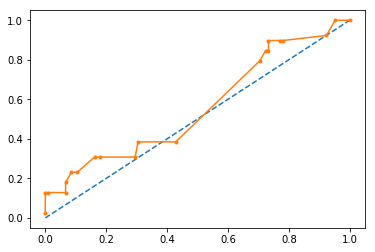

In [20]:
knn = KNeighborsClassifier(n_neighbors = 5)
trained_knn = knn.fit(X_train, y_train)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print("Training Accuracy:")
print(acc_knn)
test_knn = knn.fit(X_test, y_test)
acc_test_knn = round(knn.score(X_test, y_test) * 100, 2)
print("Testing Accuracy:")
print(acc_test_knn)
y_pred = knn.predict(X_test)
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))
print("Classification Matrix:")
print(metrics.classification_report(y_test, y_pred))
cross_val = cross_val_score(KNeighborsClassifier(), X, y, scoring='accuracy', cv=10)
print("Cross Validation value:")
print(cross_val.mean())
probs = probability[:, 1]
roc = roc_auc_score(y_test.astype(float), probs)
print('AUC: %.3f' % roc)
fpr, tpr, thresholds = roc_curve(y_test.astype(float), probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

Training Accuracy:
76.19
Testing Accuracy:
76.39
Confusion Matrix:
[[105   0]
 [ 34   5]]
Classification Matrix:
             precision    recall  f1-score   support

          0       0.76      1.00      0.86       105
          1       1.00      0.13      0.23        39

avg / total       0.82      0.76      0.69       144

Cross Validation value:
0.7440946591402519
AUC: 0.559


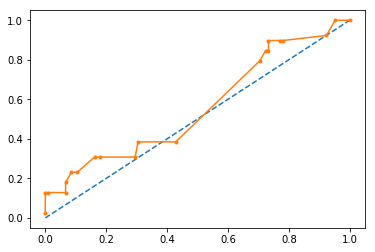

In [19]:
logistic_regression_model = LogisticRegression()
trained_logistic_regression_model = logistic_regression_model.fit(X_train, y_train)
train_accuracy = round (trained_logistic_regression_model.score(X_train, y_train)*100, 2)
print ("Training Accuracy:")
print(train_accuracy)
test_accuracy = round (trained_logistic_regression_model.score(X_test, y_test)*100, 2)
print ("Testing Accuracy:")
print(test_accuracy)
probability = logistic_regression_model.predict_proba(X_test)
predicted = logistic_regression_model.predict(X_test)
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, predicted))
print("Classification Matrix:")
print(metrics.classification_report(y_test, predicted))
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print("Cross Validation value:")
print(cross_val.mean())
probs = probability[:, 1]
roc = roc_auc_score(y_test.astype(float), probs)
print('AUC: %.3f' % roc)
fpr, tpr, thresholds = roc_curve(y_test.astype(float), probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

Training Accuracy:
82.14
Testing Accuracy:
80.56
Confusion Matrix:
[[102   3]
 [ 25  14]]
Classification Matrix:
             precision    recall  f1-score   support

          0       0.80      0.97      0.88       105
          1       0.82      0.36      0.50        39

avg / total       0.81      0.81      0.78       144

Cross Validation value:
0.7859829570125922
AUC: 0.860


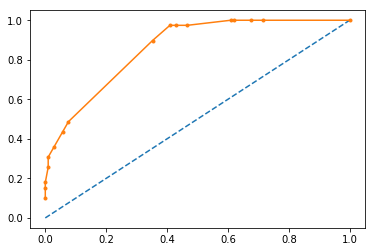

In [21]:
random_forest_model = RandomForestClassifier(n_estimators=300)
trained_random_forest_model = random_forest_model.fit(X_train, y_train)
train_accuracy = round (trained_random_forest_model.score(X_train, y_train)*100, 2)
print ("Training Accuracy:")
print(train_accuracy)
test_random_forest_model = random_forest_model.fit(X_test, y_test)
test_accuracy = round (test_random_forest_model.score(X_test, y_test)*100, 2)
predicted = random_forest_model.predict(X_test)
print ("Testing Accuracy:")
print(test_accuracy)
probability = random_forest_model.predict_proba(X_test)
predicted = random_forest_model.predict(X_test)
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, predicted))
print("Classification Matrix:")
print(metrics.classification_report(y_test, predicted))
cross_val = cross_val_score(RandomForestClassifier(), X, y, scoring='accuracy', cv=10)
print("Cross Validation value:")
print(cross_val.mean())
probs = probability[:, 1]
roc = roc_auc_score(y_test.astype(float), probs)
print('AUC: %.3f' % roc)
fpr, tpr, thresholds = roc_curve(y_test.astype(float), probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()
